In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

In [38]:
## Conversion factors
Mearth =  5.9723*10.**24 #kg
Msun = 1.9885*10.**30
Mjup = 1.89819*10**27
Rearth = 6371000. #m 
Rjup = 69911000. 
Rsun = 695700000.
sec2Myr = 60.*60.*24.*365.25*10.**6
au2meters = 149597870700.

## Set parameters
G = 6.674*10.**-11.   #N·m2/kg2  >>  N: kg·m/s2
Mplanet = 0.471*Mjup #14.9101619038*Mearth
Mstar = 1.11*Msun #0.294*Msun
Rplanet = 1.9*Rjup #0.1153068176418217*0.295*6.957*(10.**8)
Rstar = 1.237*Rsun #0.295*Rsun
Qplanet = 10**6.5 #10.**5
Qstar = 10**5.  #10.**3 ##no idea if this is correct


In [45]:
#jackson 2009

ones_e = []
twos_e = []
threes_e = []
fours_e = []

def func_e(t, a, e):
    
    one = (63./4.)*np.sqrt(G*Mstar**3.) #5.48e+51 || 5.75e+40
    two = Rplanet**5./(Qplanet*Mplanet) #833419.74 || 819404.8
    three = (225./16.)*np.sqrt(G/Mstar) #1.50e-08 || 1.50e-19
    four = (Rstar**5.*Mplanet)/Qstar #3.24e+64 || 3.24e+67
    
    global ones_e
    ones_e.append(one)
    global twos_e
    twos_e.append(two)
    global threes_e
    threes_e.append(three)
    global fours_e
    fours_e.append(four)

    ## all-in-one
    return -e*(((63/4)*np.sqrt(G*Mstar**3)*(Rplanet**5/(Qplanet*Mplanet)) \
                +(225/16)*np.sqrt(G/Mstar)*(Rstar**5*Mplanet)/Qstar))*a**(-13/2)

    ## bug check
#     return -e*((one*two)+(three*four))*a**(-13/2)


In [46]:
ones_a = []
twos_a = []
threes_a = []
fours_a = []
fives_a = []

def func_a(t, a, e):
    
    one = (63./2)*np.sqrt(G*Mstar**3) #1.13e+52 || 1.15e+41
    two = Rplanet**5./(Qplanet*Mplanet) #833419.74 || 819404.8
    three = (9./2)*np.sqrt(G/Mstar) #4.27e-09 || 4.8e-20
    four = (Rstar**5.*Mplanet)/Qstar #3.24e+64 || 3.24e+67
    five = 1.+(57./4)*e**2. #2.49e+32 || 1.45
    
# 1.1507389817739342e+41
# 833433.692408
# 4.80744758819407e-20
# 3.24223187451e+64
# 1.44643825
    
    global ones_a
    ones_a.append(one)
    global twos_a
    twos_a.append(two)
    global threes_a
    threes_a.append(three)
    global fours_a
    fours_a.append(four)
    global fives_a
    fives_a.append(five)
    
    ## all-in-one
    #return -a
    return -a*((63/2)*np.sqrt(G*Mstar**3)*(Rplanet**5/(Qplanet*Mplanet))*e**2 \
               +(9/2)*np.sqrt(G/Mstar)*((Rstar**5*Mplanet)/Qstar)*(1+(57/4)*e**2))*a**(-13/2)

    ## bug check
#     return -a*((one*two*e**2)+(three*four*five))*a**(-13/2)


In [47]:
def fun(t, y):  # y = [a,e]
#     print func_a(t, y[0], y[1])
    return [func_a(t, y[0], y[1]), func_e(t, y[0], y[1])]  # returns dy/dt = [da/dt, de/dt]

y_init = [0.0527*au2meters, 0.013] #a_init, e_init #######
time = [0., 10**5*sec2Myr]
sol = integrate.solve_ivp(fun, time, y_init)

# print time

[0.00000000e+00 1.00000000e-06 1.10000000e-05 1.11000000e-04
 1.11100000e-03 1.11110000e-02 1.11111000e-01 1.11111100e+00
 1.11111110e+01 1.11111111e+02 1.11111111e+03 1.11111111e+04
 1.11111111e+05 1.11111111e+06 1.11111111e+07 1.11111111e+08
 1.11111111e+09 1.11111111e+10 1.11111111e+11 1.11111111e+12
 1.11111111e+13 1.11111111e+14 1.11111111e+15 1.11111111e+16
 1.11111111e+17 1.11111111e+18 3.15576000e+18]
0.0527


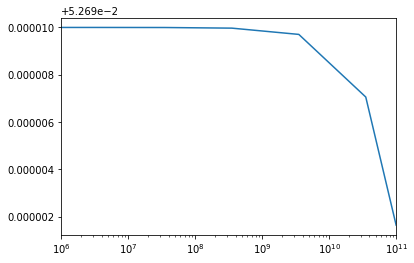

In [48]:
print sol['t']
plt.plot(sol['t']/(60.*60.*24.*365.25), sol['y'][0]/au2meters)
plt.xscale('log')
plt.xlim(1e6,1e11)
print max(sol['y'][0]/au2meters)

In [49]:
print ones_a[0]
print twos_a[0]
print threes_a[0]
print fours_a[0]
print fives_a[0]

8.438718815635412e+41
14626317.2065
2.4744650715385514e-20
4.22006463959e+66
1.00240825


(1000000.0, 100000000000.0)

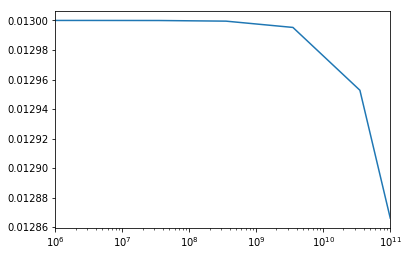

In [50]:
plt.plot(sol['t']/(60.*60.*24.*365.25), sol['y'][1])
plt.xscale('log')
plt.xlim(1e6,1e11)